In [1]:
!pip install deap

In [2]:
from deap import base
from deap import creator
from deap import tools

import random
import array
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import elitism
import queens

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

NUM_OF_QUEENS = 16
POPULATION_SIZE = 500
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.9  
P_MUTATION = 0.1   

In [0]:
def getViolationsCount(individual):
    return nQueens.getViolationsCount(individual),

nQueens = queens.NQueensProblem(NUM_OF_QUEENS)

toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

toolbox.register("randomOrder", random.sample, range(len(nQueens)), len(nQueens))
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
toolbox.register("evaluate", getViolationsCount)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb=2.0/len(nQueens))
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(nQueens))

In [0]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=False)

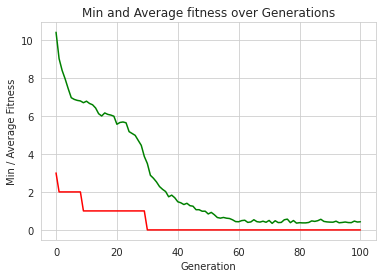

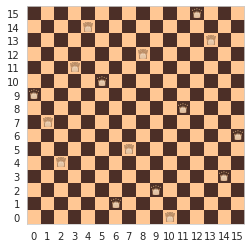

In [6]:
#print("- Best solutions are:")
#for i in range(HALL_OF_FAME_SIZE):
#    print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
plt.figure(1)
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

sns.set_style("whitegrid", {'axes.grid' : False})
nQueens.plotBoard(hof.items[0])

plt.show()